In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.optimize import minimize

df = pd.read_csv("Training Data_Case 3.csv")
df = df.rename(columns={'Unnamed: 0': 'date'})
df.set_index('date', inplace=True)

# Calculate the number of rows in df_train
train_size = int(len(df) * 0.9)

# Split the data into df_train and df_test
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]


print(df.head())

           A       B      C      D      E      F      G      H      I       J
date                                                                         
1     119.96  198.25  76.54  32.08  53.20  19.47  40.63  43.47  19.76  113.91
2     120.32  201.42  76.73  31.86  53.88  19.23  40.47  45.16  19.88  112.98
3     119.60  200.23  77.60  31.56  55.11  18.93  39.84  46.03  20.29  114.24
4     121.76  199.61  79.48  31.62  55.80  19.15  40.13  46.89  20.01  114.27
5     120.10  199.64  81.49  31.89  55.02  19.16  39.94  47.59  20.12  113.87


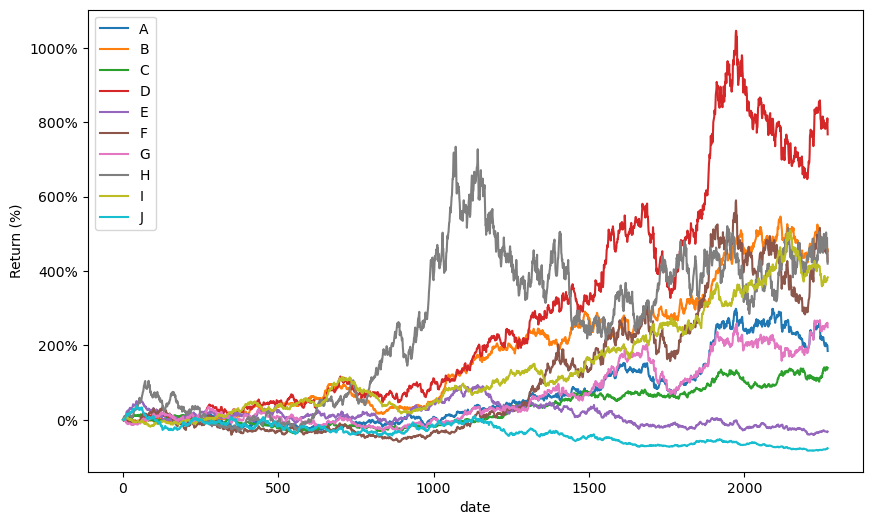

In [24]:
# Plot the returns for each asset
returns = (df_train / df_train.iloc[0]) - 1
ax = returns.plot(figsize=(10, 6))
ax.set_ylabel('Return (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))
plt.show()

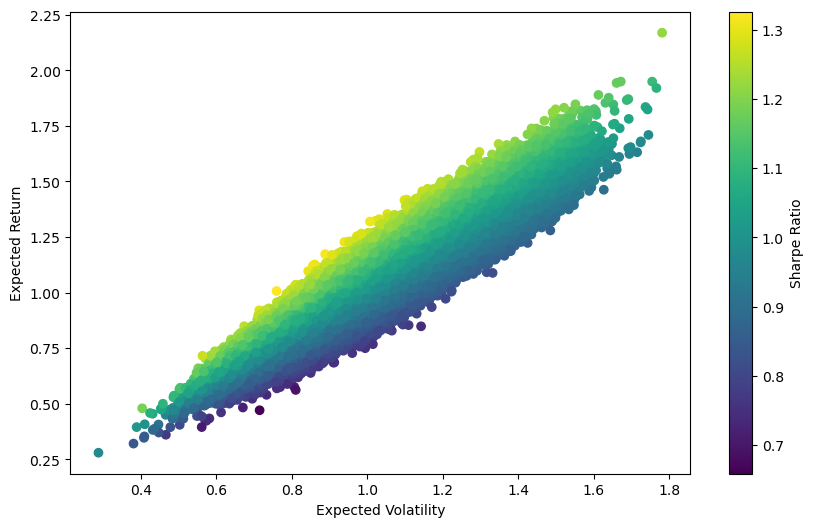

Optimal weights:
 A    0.055231
B    0.001081
C    0.015772
D    0.023713
E    0.307628
F    0.003976
G    0.113286
H    0.272378
I    0.095088
J    0.111847
Name: 74420, dtype: float64


In [28]:
# Plot efficient frontier with random weights
num_portfolios = 100000

expected_returns = returns.mean()
cov_matrix_norm = returns.cov()

all_weights = pd.DataFrame(np.zeros((num_portfolios, len(df.columns))), columns=df.columns)
port_returns = np.zeros(num_portfolios)
port_volatility = np.zeros(num_portfolios)
sharpe_ratio = np.zeros(num_portfolios)

for i in range(num_portfolios):
    weights = np.random.random(len(df.columns))
    weights /= np.sum(weights)
    all_weights.iloc[i] = weights
    
    port_returns[i] = np.sum(expected_returns * weights)
    port_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_norm, weights)))
    sharpe_ratio[i] = port_returns[i] / port_volatility[i]

max_sharpe_ratio_idx = sharpe_ratio.argmax()

plt.figure(figsize=(10, 6))
plt.scatter(port_volatility, port_returns, c=sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.show()


print('Optimal weights:\n', all_weights.iloc[max_sharpe_ratio_idx])

In [29]:
def allocate_portfolio(asset_prices):
    return all_weights.iloc[max_sharpe_ratio_idx]

In [30]:
def grading(testing): 
    weights = np.full(shape=(len(testing.index),10), fill_value=0.0)
    for i in range(0,len(testing)):
        unnormed = np.array(allocate_portfolio(df_train))
        positive = np.absolute(unnormed)
        normed = positive/np.sum(positive)
        weights[i]=list(normed)
    capital = [1]
    for i in range(len(testing) - 1):
        shares = capital[-1] * np.array(weights[i]) / np.array(testing.iloc[i,:])
        capital.append(float(np.matmul(np.reshape(shares, (1,10)),np.array(testing.iloc[i+1,:]))))
    returns = (np.array(capital[1:]) - np.array(capital[:-1]))/np.array(capital[:-1])
    return np.mean(returns)/ np.std(returns) * (252 ** 0.5), capital, weights

grading(df_test)

(1.7942789616987231,
 [1,
  0.9944784005074304,
  0.9748452722909705,
  0.9532477384745688,
  0.9501742253174006,
  0.9493932642769284,
  0.9655691644027874,
  0.9724848907002797,
  0.9844358878543074,
  0.9656158770532253,
  0.9787986626767486,
  0.9935283084071767,
  0.9652985878933604,
  0.9705218199270105,
  0.9671160043282084,
  0.9641326543013666,
  0.9566900458457565,
  0.957467175390116,
  0.9393474909589974,
  0.9156576573461661,
  0.9086112336494215,
  0.9204598519380078,
  0.9377154562076985,
  0.9467143969457507,
  0.9488752224735882,
  0.9408012962002532,
  0.9299061923550568,
  0.9343008221478798,
  0.9424724717364446,
  0.9379165571591322,
  0.9265639170229316,
  0.9306957635383282,
  0.9339343231407063,
  0.9238427011777367,
  0.9167114577923235,
  0.9196558105996813,
  0.9217119085461308,
  0.9308281419367037,
  0.92292780046683,
  0.9165159948280962,
  0.9281578804269635,
  0.9055702238628814,
  0.9153884977316431,
  0.9254763321984869,
  0.914945742629745,
  0.909101